In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


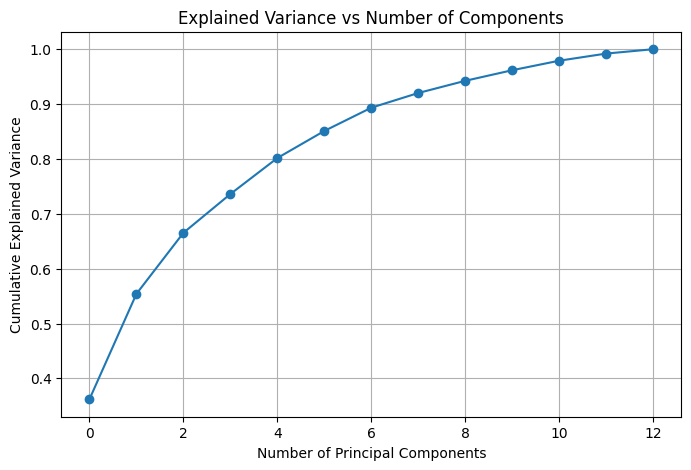

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.savefig("explained_variance.png")
plt.show()


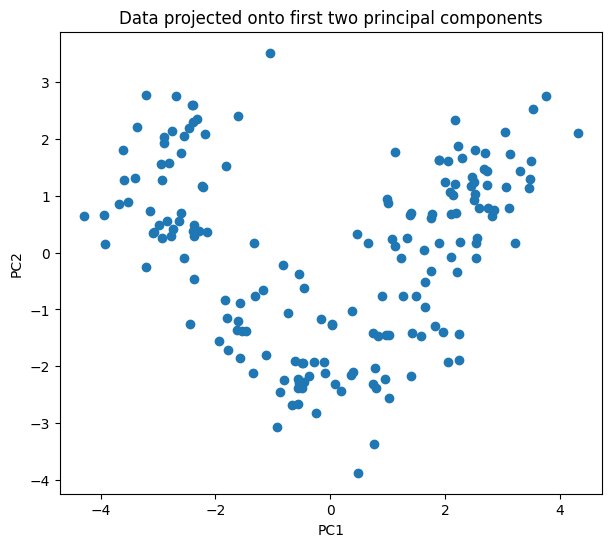

In [5]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data projected onto first two principal components")
plt.savefig("pca_2d_projection.png")
plt.show()


In [6]:
pca_2 = PCA(n_components=2)
X_reduced = pca_2.fit_transform(X_scaled)
X_reconstructed = pca_2.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)

print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 0.44593661643064725


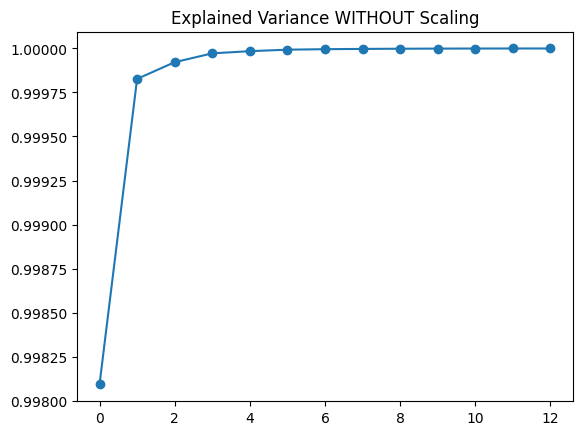

In [7]:
pca_no_scale = PCA()
X_pca_no_scale = pca_no_scale.fit_transform(X)

plt.plot(np.cumsum(pca_no_scale.explained_variance_ratio_), marker='o')
plt.title("Explained Variance WITHOUT Scaling")
plt.savefig("no_scaling_variance.png")
plt.show()


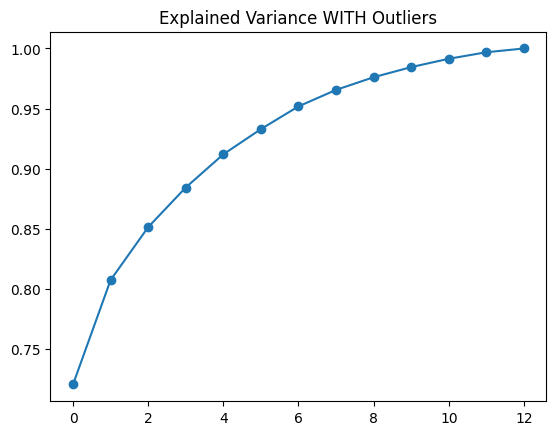

In [8]:
import numpy as np
X_outlier = X_scaled.copy()
X_outlier[0] = X_outlier[0] * 15

pca_outlier = PCA()
pca_outlier.fit(X_outlier)

plt.plot(np.cumsum(pca_outlier.explained_variance_ratio_), marker='o')
plt.title("Explained Variance WITH Outliers")
plt.savefig("outlier_variance.png")
plt.show()
